In [7]:
%run preamble.ipynb

In [8]:

from scipy import stats as ss

# Load the data

In [9]:
ts = np.load("data/audiofiwepoch14600_step496400Ts.npy")

In [10]:
zs = np.load("data/audiofiwepoch14600_step496400Zs.npy")

In [12]:
res = np.load("data/audioAvgfiwepoch14600_step496400.npy", allow_pickle=True)

In [13]:
bit0 = [x for x in res if x[0] == 0]

In [14]:
bit1 = [x for x in res if x[0] == 1]

In [15]:
bit2 = [x for x in res if x[0] == 2]

In [16]:
bit3 = [x for x in res if x[0] == 3]

In [17]:
bit4 = [x for x in res if x[0] == 4]

# Check: replication of the  number of clicks results

Note: the results are from separate data generation run, meaning the covariates $X$ were sampled independently of the results for the number of clicks - the results are, nonetheless, virtually identical, which alleviates potential concerns regarding the sample size.

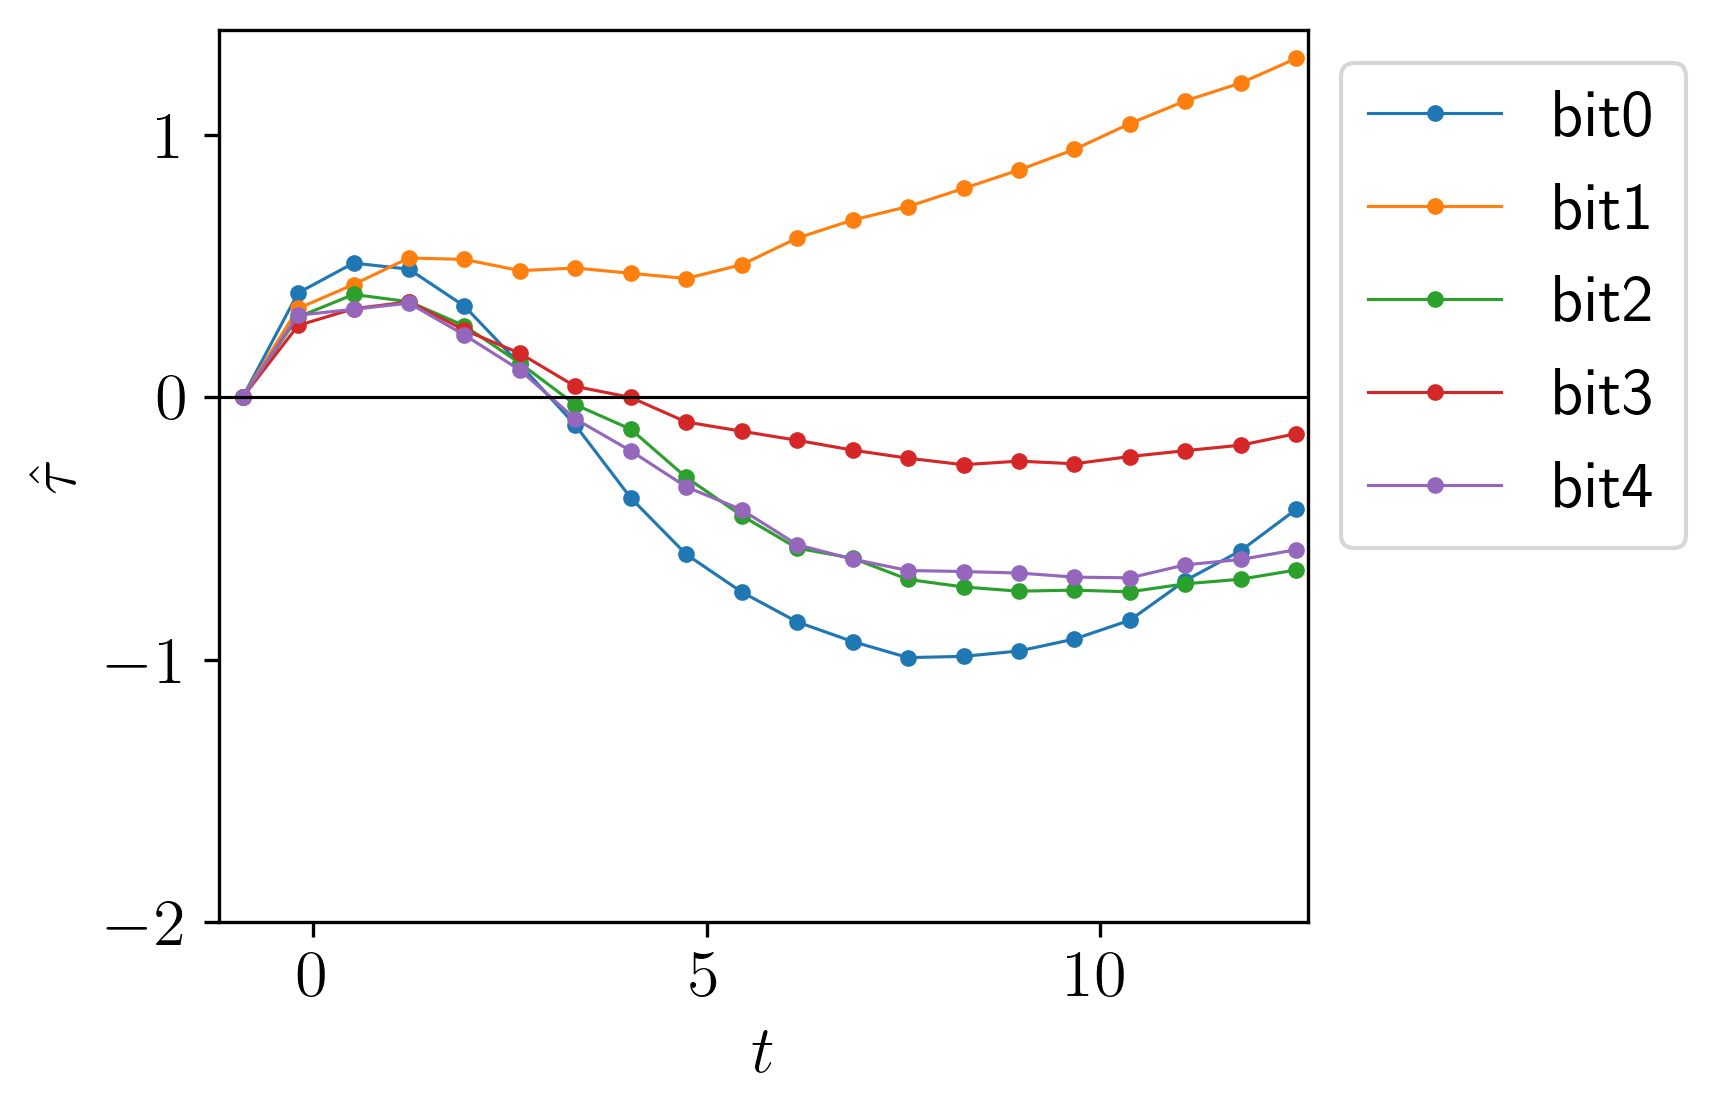

In [23]:
plt.plot(ts, [b[2][0] - bit0[0][2][0] for b in bit0], label="bit0", marker=".");
plt.plot(ts, [b[2][0] - bit1[0][2][0] for b in bit1], label="bit1", marker=".");
plt.plot(ts, [b[2][0] - bit2[0][2][0] for b in bit2], label="bit2", marker=".");
plt.plot(ts, [b[2][0] - bit3[0][2][0] for b in bit3], label="bit3", marker=".");
plt.plot(ts, [b[2][0] - bit4[0][2][0] for b in bit4], label="bit4", marker=".");

plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}$");

plt.ylim(-2, 1.4);
plt.xlim(-1.2, 12.65);

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout()

# ATE

## The spectral mean

**ATE -1**

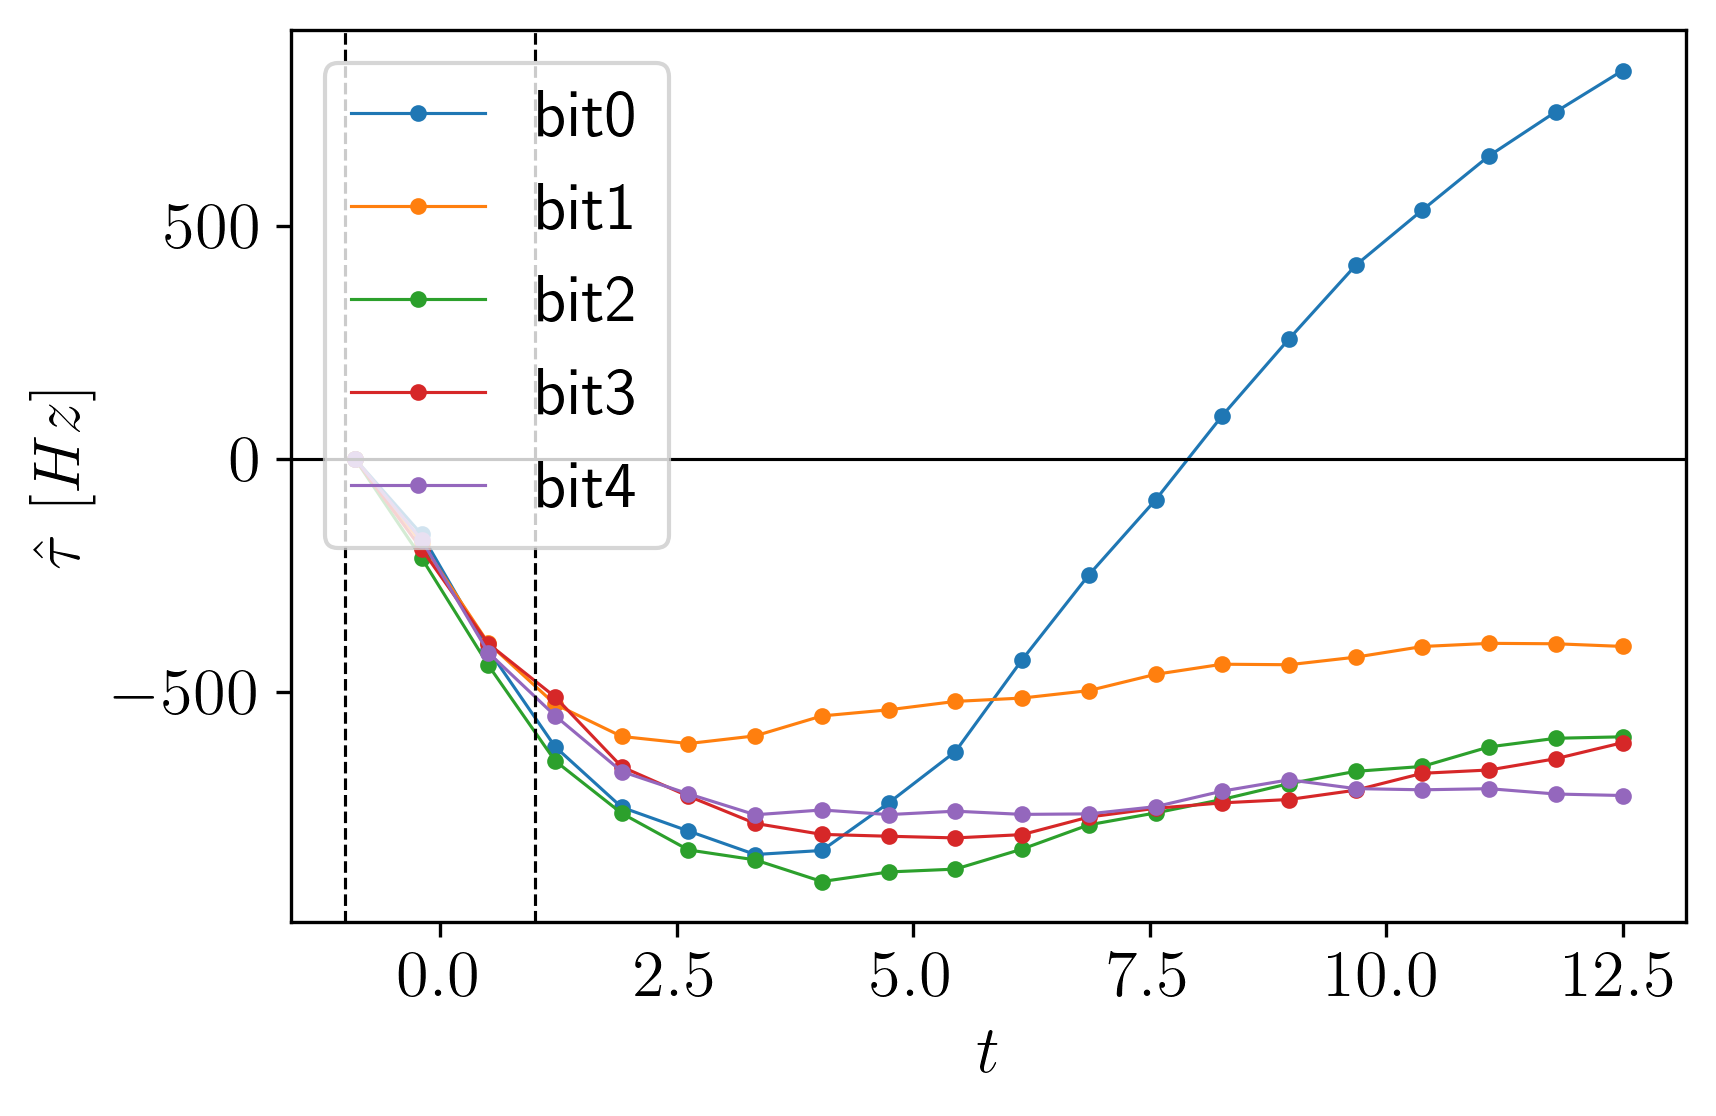

In [27]:
plt.plot(ts, np.array([b[2][2][0] for b in bit0]) - bit0[0][2][2][0], label="bit0", marker=".");
plt.plot(ts, np.array([b[2][2][0] for b in bit1]) - bit1[0][2][2][0], label="bit1", marker=".");
plt.plot(ts, np.array([b[2][2][0] for b in bit2]) - bit2[0][2][2][0], label="bit2", marker=".");
plt.plot(ts, np.array([b[2][2][0] for b in bit3]) - bit3[0][2][2][0], label="bit3", marker=".");
plt.plot(ts, np.array([b[2][2][0] for b in bit4]) - bit4[0][2][2][0], label="bit4", marker=".");

plt.axhline(0, c='k');
plt.axvline(-1, ls="--", c='k');
plt.axvline(1, ls="--", c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}~[Hz]$");

plt.legend(loc="upper left");
plt.tight_layout()



**ATE +1**

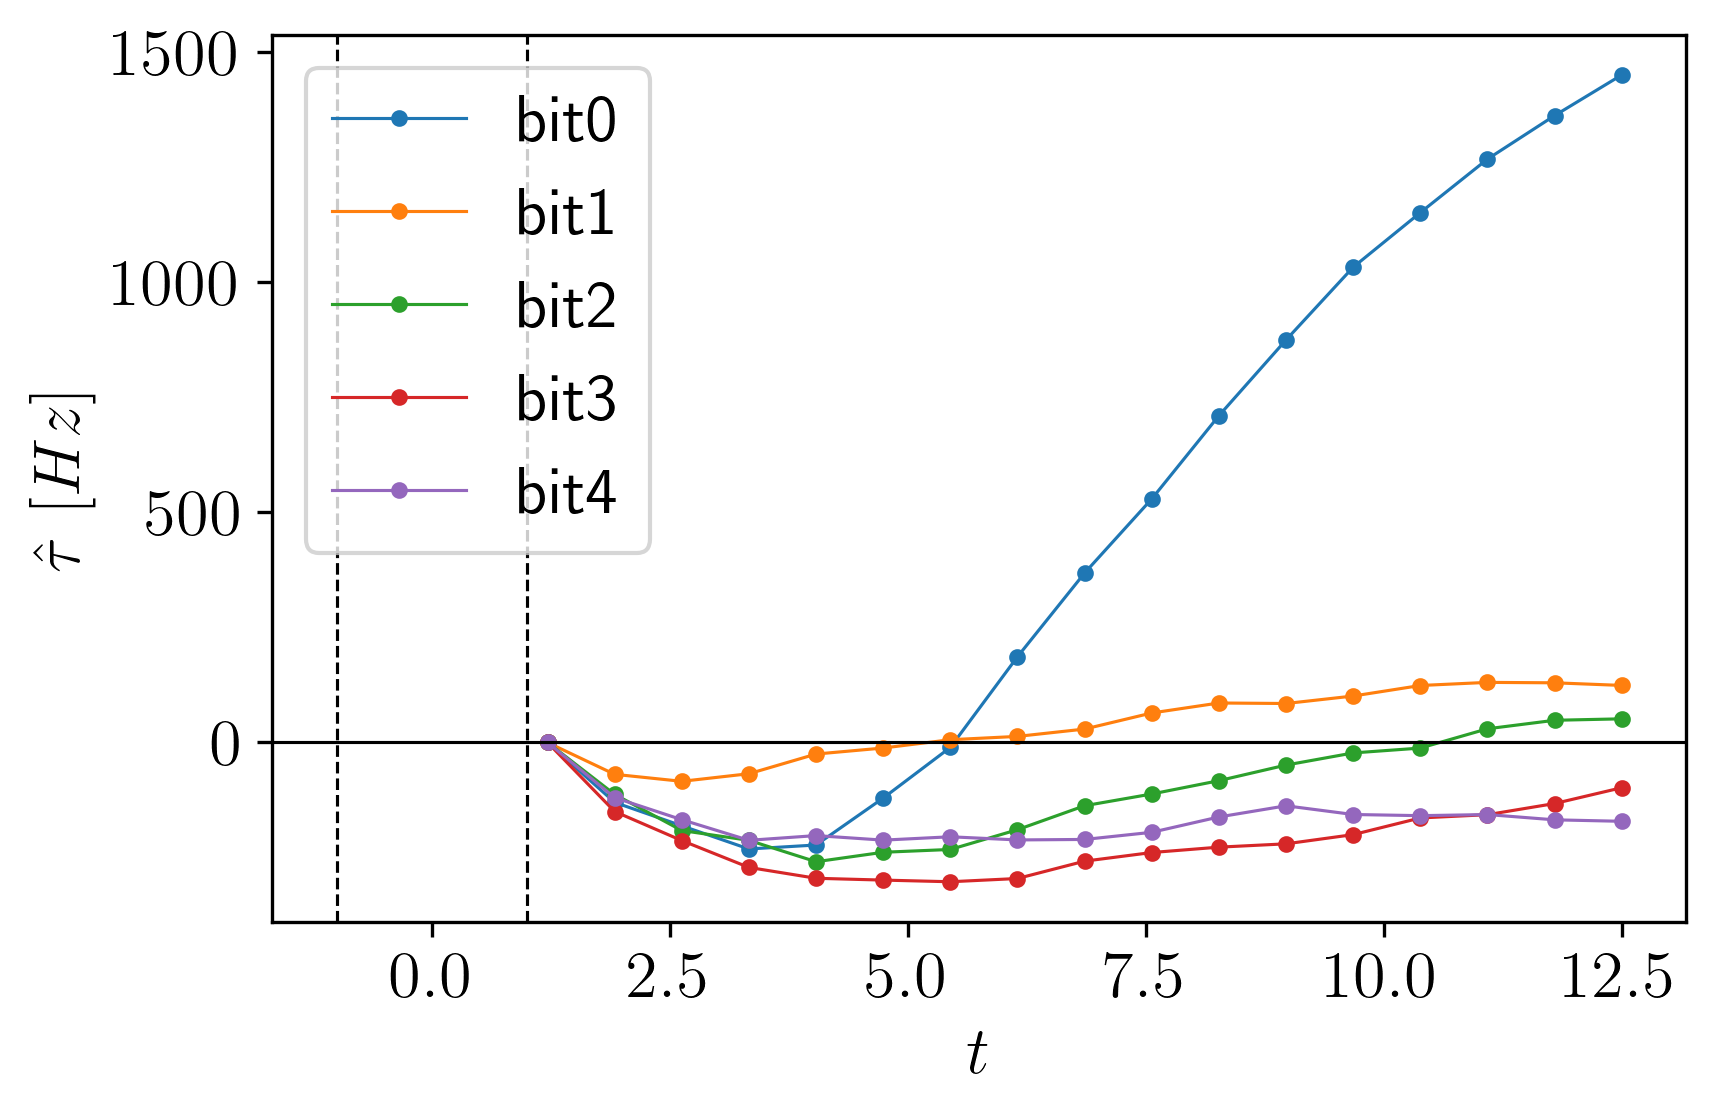

In [28]:
plt.plot(ts[3:], np.array([b[2][2][0] for b in bit0[3:]]) - bit0[3][2][2][0], label="bit0", marker=".");
plt.plot(ts[3:], np.array([b[2][2][0] for b in bit1[3:]]) - bit1[3][2][2][0], label="bit1", marker=".");
plt.plot(ts[3:], np.array([b[2][2][0] for b in bit2[3:]]) - bit2[3][2][2][0], label="bit2", marker=".");
plt.plot(ts[3:], np.array([b[2][2][0] for b in bit3[3:]]) - bit3[3][2][2][0], label="bit3", marker=".");
plt.plot(ts[3:], np.array([b[2][2][0] for b in bit4[3:]]) - bit4[3][2][2][0], label="bit4", marker=".");

plt.axhline(0, c='k');

plt.axvline(-1, ls="--", c='k');
plt.axvline(1, ls="--", c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}~[Hz]$");

plt.legend(loc="upper left");
plt.tight_layout()




## Spectral regularity within a coda

**ATE -1**

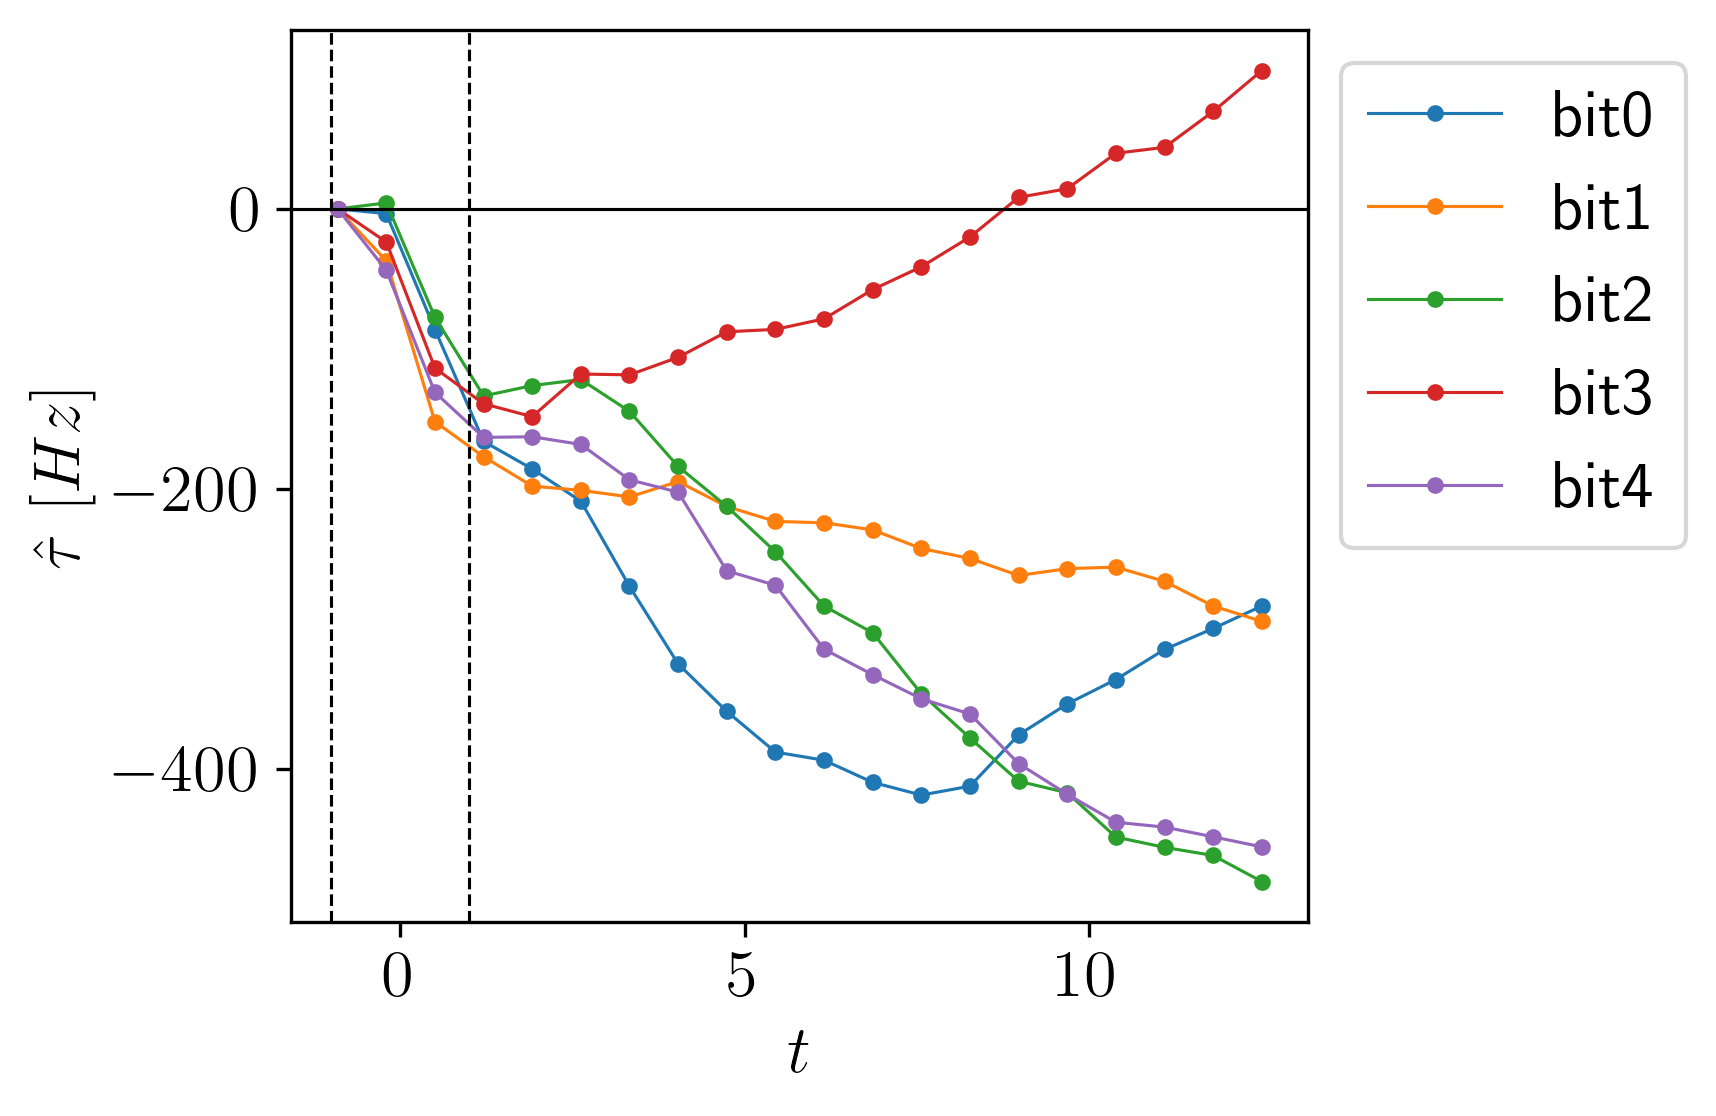

In [32]:

plt.plot(ts, ([b[2][2][1] for b in bit0] - bit0[0][2][2][1]), label="bit0", marker=".");
plt.plot(ts, ([b[2][2][1] for b in bit1] - bit1[0][2][2][1]), label="bit1", marker=".");
plt.plot(ts, ([b[2][2][1] for b in bit2] - bit2[0][2][2][1]), label="bit2", marker=".");
plt.plot(ts, ([b[2][2][1] for b in bit3] - bit3[0][2][2][1]), label="bit3", marker=".");
plt.plot(ts, ([b[2][2][1] for b in bit4] - bit4[0][2][2][1]), label="bit4", marker=".");

plt.axhline(0, c='k');
plt.axvline(-1, ls="--", c='k');
plt.axvline(1, ls="--", c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}~[Hz]$");

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout()



**ATE +1**

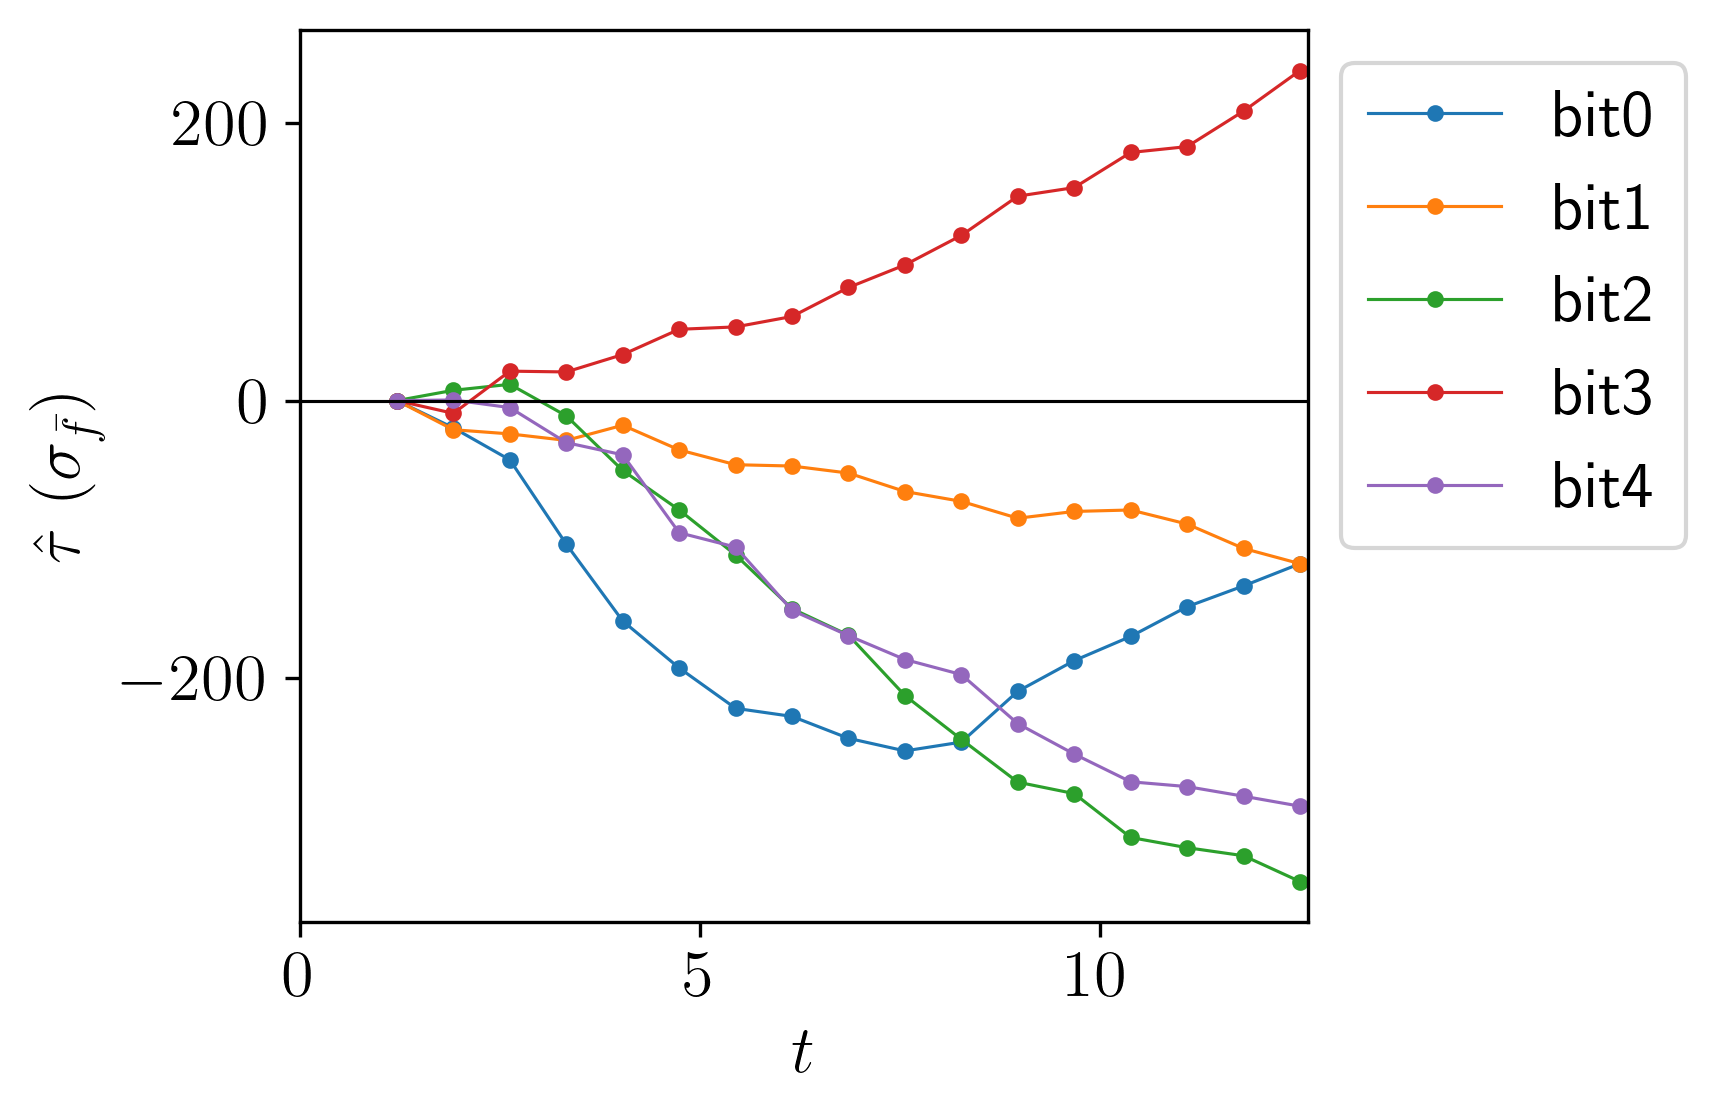

In [34]:
plt.plot(ts[3:], ([b[2][2][1] for b in bit0[3:]] - bit0[3][2][2][1]), label="bit0", marker=".");
plt.plot(ts[3:], ([b[2][2][1] for b in bit1[3:]] - bit1[3][2][2][1]), label="bit1", marker=".");
plt.plot(ts[3:], ([b[2][2][1] for b in bit2[3:]] - bit2[3][2][2][1]), label="bit2", marker=".");
plt.plot(ts[3:], ([b[2][2][1] for b in bit3[3:]] - bit3[3][2][2][1]), label="bit3", marker=".");
plt.plot(ts[3:], ([b[2][2][1] for b in bit4[3:]] - bit4[3][2][2][1]), label="bit4", marker=".");

plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}~(\sigma_{\bar{f}})$");

# plt.legend(loc="best");
plt.xlim((0, 12.6))
plt.legend(loc="best", bbox_to_anchor=(1, 1));

plt.tight_layout()



# ICE

## Mean

In [38]:
tInd = 3

In [39]:
(np.diff([b[2][1][0] for b in bit0[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

127.3711332134394

In [40]:
(np.diff([b[2][1][0] for b in bit1[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

25.524437477088632

In [41]:
(np.diff([b[2][1][0] for b in bit2[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

19.31455087072338

In [42]:
(np.diff([b[2][1][0] for b in bit3[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

2.7525573537556944

In [43]:
(np.diff([b[2][1][0] for b in bit4[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

-1.240057741046142

In [44]:
(np.diff([b[2][2][0] for b in bit0[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

128.57535027919175

In [45]:
(np.diff([b[2][2][0] for b in bit1[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

10.989990618057611

In [46]:
(np.diff([b[2][2][0] for b in bit2[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

4.5569095257263506

In [47]:
(np.diff([b[2][2][0] for b in bit3[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

-8.708943515136395

In [48]:
(np.diff([b[2][2][0] for b in bit4[5:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

-0.3537168266604457

## STD

In [54]:
(np.diff([b[2][2][1] for b in bit0]) / ((ts[-1] - ts[0]) / (len(ts) - 1))).mean()

-21.1686787757268

In [55]:
(np.diff([b[2][2][1] for b in bit1]) / ((ts[-1] - ts[0]) / (len(ts) - 1))).mean()

-21.98604668431115

In [56]:
(np.diff([b[2][2][1] for b in bit2]) / ((ts[-1] - ts[0]) / (len(ts) - 1))).mean()

-35.85425961206151

In [57]:
(np.diff([b[2][2][1] for b in bit3]) / ((ts[-1] - ts[0]) / (len(ts) - 1))).mean()

7.374715225368843

In [58]:
(np.diff([b[2][2][1] for b in bit4]) / ((ts[-1] - ts[0]) / (len(ts) - 1))).mean()

-34.0067472088519

In [59]:
tInd = 3

In [60]:
(np.diff([b[2][2][1] for b in bit0[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

-10.42252313525402

In [61]:
(np.diff([b[2][2][1] for b in bit1[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

-10.423526132682046

In [62]:
(np.diff([b[2][2][1] for b in bit2[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

-30.736563422958472

In [63]:
(np.diff([b[2][2][1] for b in bit3[tInd:]]) / ((ts[-1] - ts[tInd]) / (len(ts[tInd:]) - 1))).mean()

21.092157054722517

In [64]:
(np.diff([b[2][2][1] for b in bit4]) / ((ts[-1] - ts[0]) / (len(ts[tInd:]) - 1))).mean()

-28.63726080745423

# Wasserstein mean spectral distance

In [65]:
bit0WS1 = list(map(lambda x: ss.wasserstein_distance(u_values=bit0[3][2][3][0],
                                                     v_values=x[0], u_weights=bit0[3][2][3][1],
                                                     v_weights=x[1]),
                   [b[2][3] for b in bit0[3:]]))

In [66]:
bit1WS1 = list(map(lambda x: ss.wasserstein_distance(u_values=bit1[3][2][3][0],
                                                     v_values=x[0], u_weights=bit1[3][2][3][1],
                                                     v_weights=x[1]),
                   [b[2][3] for b in bit1[3:]]))

In [67]:
bit2WS1 = list(map(lambda x: ss.wasserstein_distance(u_values=bit2[3][2][3][0],
                                                     v_values=x[0], u_weights=bit2[3][2][3][1],
                                                     v_weights=x[1]),
                   [b[2][3] for b in bit2[3:]]))

In [68]:
bit3WS1 = list(map(lambda x: ss.wasserstein_distance(u_values=bit3[3][2][3][0],
                                                     v_values=x[0], u_weights=bit3[3][2][3][1],
                                                     v_weights=x[1]),
                   [b[2][3] for b in bit3[3:]]))

In [69]:
bit4WS1 = list(map(lambda x: ss.wasserstein_distance(u_values=bit4[3][2][3][0],
                                                     v_values=x[0], u_weights=bit4[3][2][3][1],
                                                     v_weights=x[1]),
                   [b[2][3] for b in bit4[3:]]))

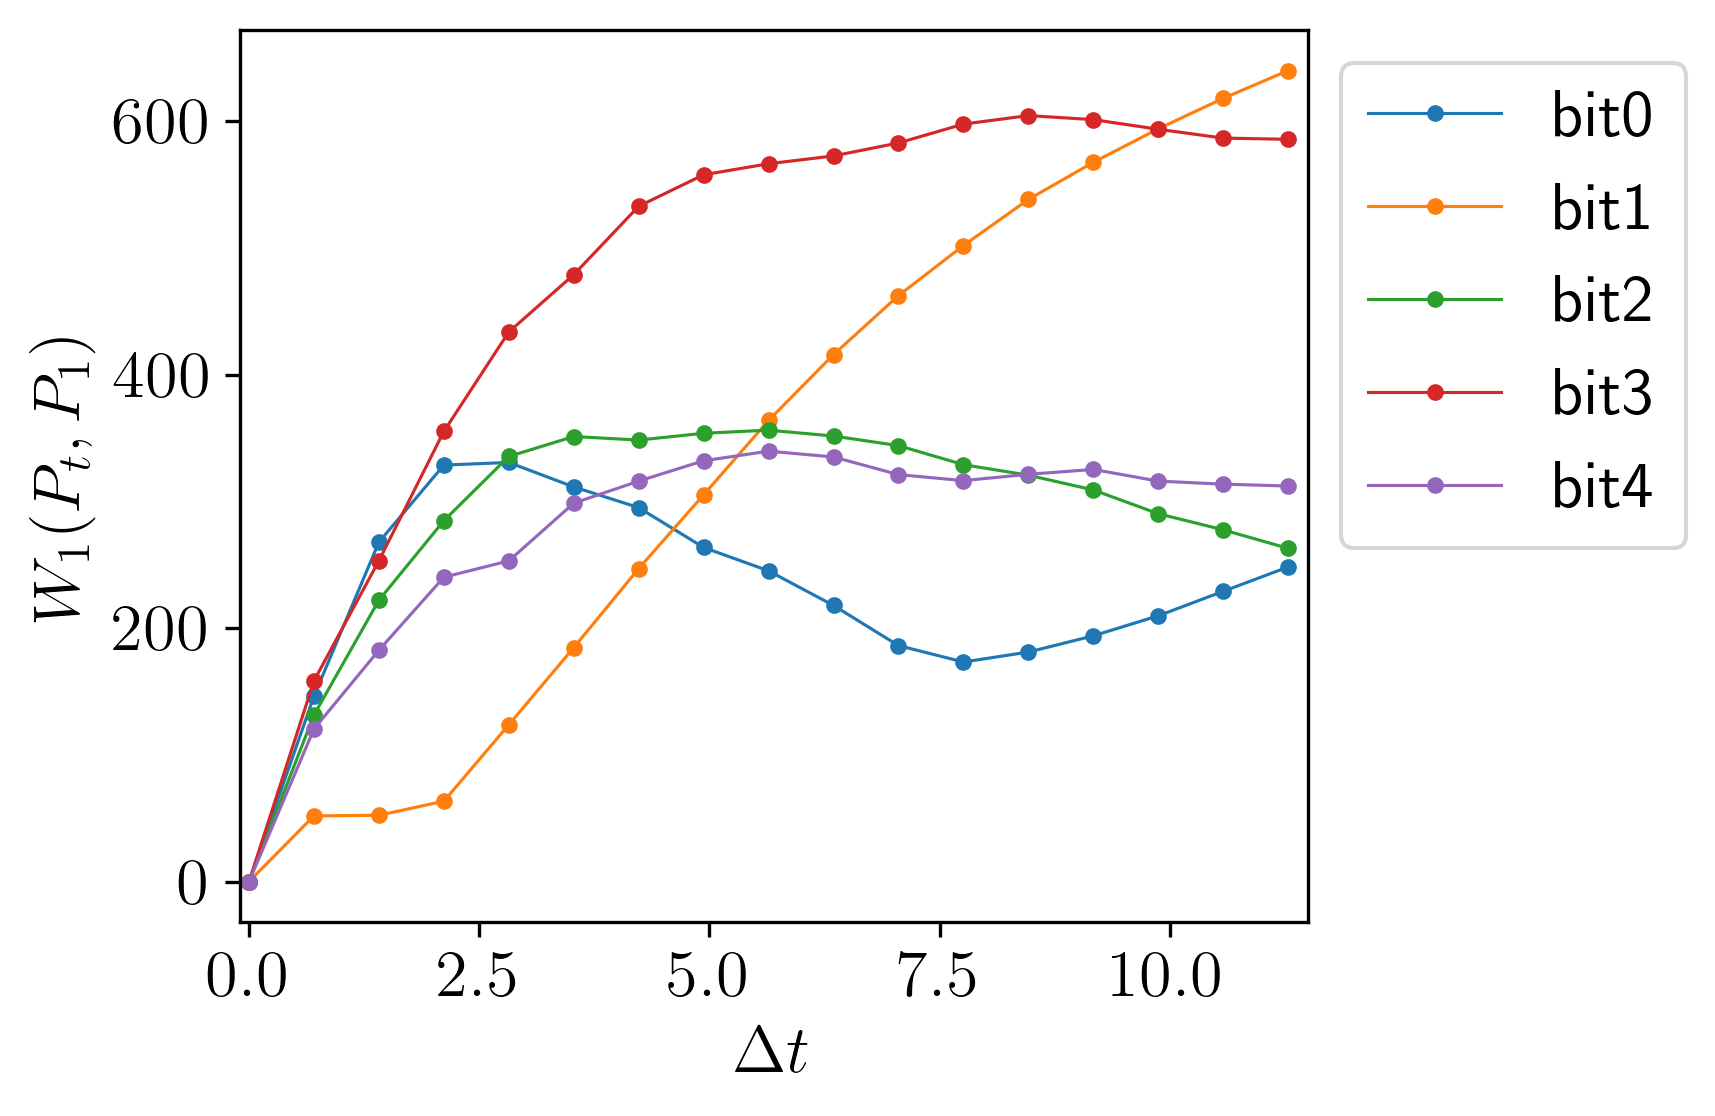

In [70]:
plt.plot(ts[3:] - ts[3], bit0WS1, label="bit0", marker=".");
plt.plot(ts[3:] - ts[3], bit1WS1, label="bit1", marker=".");
plt.plot(ts[3:] - ts[3], bit2WS1, label="bit2", marker=".");
plt.plot(ts[3:] - ts[3], bit3WS1, label="bit3", marker=".");
plt.plot(ts[3:] - ts[3], bit4WS1, label="bit4", marker=".");

plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$W_1(P_t, P_1)$")
plt.xlim((-.1, 11.5))

plt.legend(bbox_to_anchor=(1., 1.));

plt.tight_layout()
